# Linear Regression with a Single Neuron

This notebook demonstrates how neural networks learn patterns from data. We'll start with simple linear regression (1 neuron) and progress to more complex networks.

## Part 1: Linear Regression Basics

**What is Linear Regression?**  
Finds the best straight line fit for data points (x,y) using the equation:

```math
y = wx + b
```

Where:
- `w` = slope (how steep the line is)
- `b` = y-intercept (where line crosses the y-axis)

**Learning Goal**: Adjust `w` and `b` to minimize prediction errors

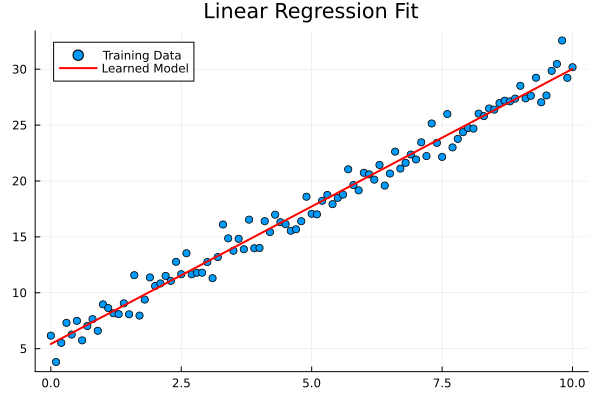

In [1]:
# Load plotting library (similar to matplotlib in Python)
using Plots

# Create synthetic training data
# True relationship: y = 2.5x + 5, with some random noise added
x = 0:0.1:10  # Input values from 0 to 10 in 0.1 steps
y = 2.5 .* x .+ 5 .+ randn(length(x))  # Output values with noise

# Solve for optimal w and b using matrix math (least squares method)
X = [x ones(length(x))]  # Prepare data matrix
w_b = X \ y  # This calculates the best w and b

# Extract the learned parameters
w, b = w_b[1], w_b[2]

# Visualize results
scatter(x, y, label="Training Data", 
        title="Linear Regression Fit")
plot!(x, w .* x .+ b, label="Learned Model", 
      linewidth=2, color=:red)

## Part 2: Neural Network with Two Neurons

**Why Use Neural Networks?**  
Linear regression can only learn straight lines. By adding:
1. Multiple neurons
2. Non-linear activation functions

We can learn complex patterns like curves!

**Our Simple Network**:
```math
ŷ = w_1σ(a_1x + b_1) + w_2σ(a_2x + b_2) + c
```

Where `σ` is the sigmoid function that adds non-linearity:

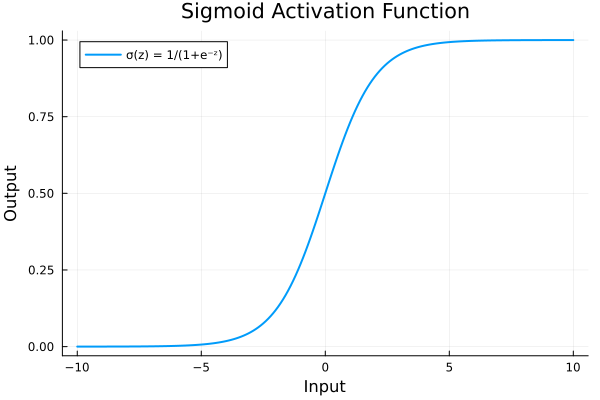

In [2]:
# Sigmoid "Squashing" Function
# Takes any number and outputs between 0 and 1
σ(x) = 1 / (1 + exp(-x))

# Visualize the sigmoid
plot(-10:0.1:10, σ.(-10:0.1:10),
    title="Sigmoid Activation Function",
    xlabel="Input", ylabel="Output",
    label="σ(z) = 1/(1+e⁻ᶻ)",
    linewidth=2)

## Part 3: Learning Process - Gradient Descent

**How Neural Networks Learn**:
1. Start with random parameters
2. Calculate how wrong predictions are (loss)
3. Adjust parameters to reduce loss (gradient descent)

**Simple Example**: Minimizing `f(θ) = (θ-3)²`

In [3]:
# Define our function and its slope (derivative)
f(θ) = (θ - 3)^2  # Quadratic function with minimum at θ=3
df(θ) = 2*(θ - 3)  # Slope at any point θ

# Gradient Descent Settings
θ = -5.0     # Start guessing way off at θ=-5
η = 0.1      # Learning rate (step size)
steps = 20   # Number of updates

println("Starting at θ = ", θ)
for step in 1:steps
    slope = df(θ)           # Current slope
    θ -= η * slope          # Move opposite to slope
    println("Step ", step, ": θ = ", round(θ, digits=4))
end

Starting at θ = -5.0
Step 1: θ = -3.4
Step 2: θ = -2.12
Step 3: θ = -1.096
Step 4: θ = -0.2768
Step 5: θ = 0.3786
Step 6: θ = 0.9028
Step 7: θ = 1.3223
Step 8: θ = 1.6578
Step 9: θ = 1.9263
Step 10: θ = 2.141
Step 11: θ = 2.3128
Step 12: θ = 2.4502
Step 13: θ = 2.5602
Step 14: θ = 2.6482
Step 15: θ = 2.7185
Step 16: θ = 2.7748
Step 17: θ = 2.8199
Step 18: θ = 2.8559
Step 19: θ = 2.8847
Step 20: θ = 2.9078


## Part 4: Building Our Neural Network

**Network Components**:
1. **Input Layer**: Receives x values
2. **Hidden Layer**: 2 neurons with sigmoid activation
3. **Output Layer**: Combines neuron outputs

Epoch 1000, Loss = 68.7880908802595
Epoch 2000, Loss = 57.387629086076736
Epoch 3000, Loss = 49.17387330651258
Epoch 4000, Loss = 39.21595544754646
Epoch 5000, Loss = 30.473769871896042
Epoch 6000, Loss = 24.099320956846103
Epoch 7000, Loss = 19.443759351761507
Epoch 8000, Loss = 15.985982704984233
Epoch 9000, Loss = 13.378275431922
Epoch 10000, Loss = 11.384702348260976
Epoch 11000, Loss = 9.841813689742867
Epoch 12000, Loss = 8.634358285917632
Epoch 13000, Loss = 7.679778629977207
Epoch 14000, Loss = 6.918073666858488
Epoch 15000, Loss = 6.305048160205603
Epoch 16000, Loss = 5.807744253910338
Epoch 17000, Loss = 5.4013030157214805
Epoch 18000, Loss = 5.06677739340534
Epoch 19000, Loss = 4.789587377727056
Epoch 20000, Loss = 4.558414709996858
Epoch 21000, Loss = 4.364402455042627
Epoch 22000, Loss = 4.200568729734803
Epoch 23000, Loss = 4.061372693683008
Epoch 24000, Loss = 3.9423900406619095
Epoch 25000, Loss = 3.8400680927279125
Epoch 26000, Loss = 3.7515393539243838
Epoch 27000, Lo

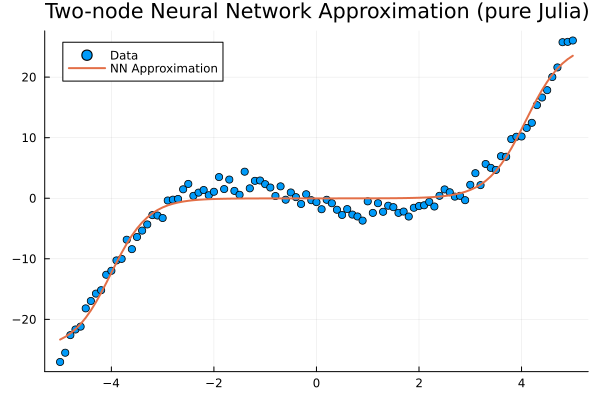

In [4]:
# Cell 4. Non linear fitting with two nodes neural network
using Plots

# Define sigmoid activation function and its derivative
sigma(z) = 1 / (1 + exp(-z))
dsigma(z) = sigma(z) * (1 - sigma(z))

# Generate synthetic nonlinear data
x = collect(-5:0.1:5)
y = 0.3 .* x.^3 .- 2 .* x .+ randn(length(x))  # cubic function with noise

# Initialize parameters randomly
a1, b1, w1 = randn(), randn(), randn()
a2, b2, w2 = randn(), randn(), randn()
c = randn()

# Hyperparameters
eta = 0.001  # learning rate
epochs = 50000
N = length(x)

# Training loop (Gradient descent)
for epoch in 1:epochs
    # Initialize gradients
    grad_a1, grad_b1, grad_w1 = 0.0, 0.0, 0.0
    grad_a2, grad_b2, grad_w2 = 0.0, 0.0, 0.0
    grad_c = 0.0
    
    loss = 0.0

    for i in 1:N
        xi, yi = x[i], y[i]

        # Forward pass: compute activations
        z1 = a1 * xi + b1
        z2 = a2 * xi + b2
        
        sigma_z1 = sigma(z1)
        sigma_z2 = sigma(z2)

        # Compute predicted output
        y_hat = w1 * sigma_z1 + w2 * sigma_z2 + c
        error = y_hat - yi
        loss += error^2
        
        # Compute gradients (using chain rule)
        grad_w1 += (2/N) * error * sigma_z1
        grad_w2 += (2/N) * error * sigma_z2
        grad_c  += (2/N) * error
        
        grad_a1 += (2/N) * error * w1 * dsigma(z1) * xi
        grad_b1 += (2/N) * error * w1 * dsigma(z1)

        grad_a2 += (2/N) * error * w2 * dsigma(z2) * xi
        grad_b2 += (2/N) * error * w2 * dsigma(z2)
    end
    
    # Update parameters
    w1 -= eta * grad_w1
    w2 -= eta * grad_w2
    c  -= eta * grad_c
    
    a1 -= eta * grad_a1
    b1 -= eta * grad_b1
    
    a2 -= eta * grad_a2
    b2 -= eta * grad_b2
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0
        println("Epoch ", epoch, ", Loss = ", loss/N)
    end
end

# Plot the results after training
y_hat_final = [w1 * sigma(a1 * xi + b1) + w2 * sigma(a2 * xi + b2) + c for xi in x]

scatter(x, y, label="Data", title="Two-node Neural Network Approximation (pure Julia)")
plot!(x, y_hat_final, label="NN Approximation", lw=2)


## Part 5: Flexible Network Structure

**Improved Architecture**:
- Now supports any number of neurons
- Organized using Julia structs
- Same learning principles apply

Training Round: 5000, Current Error: 13.372926425484659
Training Round: 10000, Current Error: 7.054361483941297
Training Round: 15000, Current Error: 4.202926336699617
Training Round: 20000, Current Error: 2.8291475489102273
Training Round: 25000, Current Error: 2.1170696802000597
Training Round: 30000, Current Error: 1.7206241159276576
Training Round: 35000, Current Error: 1.483347513042256
Training Round: 40000, Current Error: 1.3311554865246291
Training Round: 45000, Current Error: 1.2273616815772037
Training Round: 50000, Current Error: 1.1528942528550428


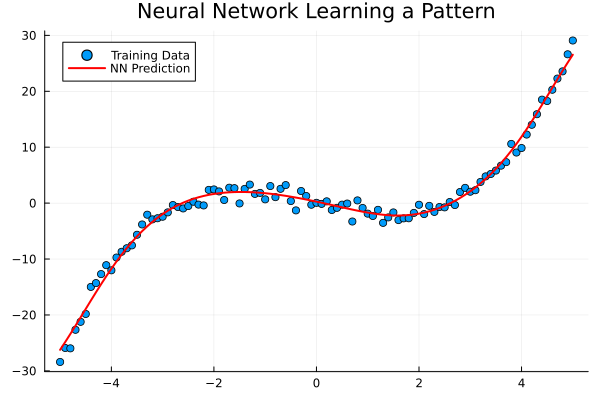

In [5]:
# Cell 5. Reworked Neural Network using Julia Struct

# First we load the plotting library (like matplotlib in Python)
using Plots

# ACTIVATION FUNCTIONS - These decide how "active" each neuron should be
# Sigmoid squashes numbers between 0 and 1 (like an on/off switch but smoother)
sigmoid(x) = 1 / (1 + exp(-x))  

# Derivative of sigmoid (tells us how to adjust weights during learning)
sigmoid_derivative(x) = sigmoid(x) * (1 - sigmoid(x))  

# OUR NEURAL NETWORK STRUCTURE - Like a recipe for how the network is built
mutable struct SimpleNN
    # Weights from input to hidden layer (how important each input is)
    input_weights::Vector{Float64}   
    
    # Biases for hidden layer (helps neurons "fire" more easily)
    hidden_biases::Vector{Float64}   
    
    # Weights from hidden to output (how important each hidden neuron is)
    output_weights::Vector{Float64}  
    
    # Output bias (final adjustment to the prediction)
    output_bias::Float64           
end

# CREATE A NEW NETWORK - Sets up random starting values
function SimpleNN(num_neurons::Int)
    SimpleNN(
        randn(num_neurons),  # Random input weights (-1 to 1)
        randn(num_neurons),  # Random hidden biases (-1 to 1)
        randn(num_neurons),  # Random output weights (-1 to 1)
        randn()             # Random output bias (-1 to 1)
    )
end

# FORWARD PASS - How the network makes predictions
function forward(network::SimpleNN, input_value)
    # Step 1: Hidden layer combines inputs with weights and biases
    hidden_input = network.input_weights .* input_value .+ network.hidden_biases
    
    # Step 2: Apply activation function to each hidden neuron
    hidden_output = sigmoid.(hidden_input)  
    
    # Step 3: Combine hidden outputs to make final prediction
    prediction = sum(network.output_weights .* hidden_output) + network.output_bias
    
    return prediction, hidden_output, hidden_input
end

# BACKWARD PASS (LEARNING) - Adjusts weights to reduce errors
function backward(network::SimpleNN, x, y, prediction, hidden_output, hidden_input)
    error = prediction - y  # How far off we were
    
    # Calculate how much to change each weight:
    # 1. For output weights (based on hidden layer activity)
    grad_output_weights = 2 .* error .* hidden_output
    
    # 2. For output bias (simple error adjustment)
    grad_output_bias = 2 .* error
    
    # 3. For input weights (more complex chain rule)
    hidden_error = 2 .* error .* network.output_weights .* sigmoid_derivative.(hidden_input)
    grad_input_weights = hidden_error .* x
    grad_hidden_biases = hidden_error
    
    return grad_input_weights, grad_hidden_biases, grad_output_weights, grad_output_bias, error^2
end

# UPDATE WEIGHTS - Actually changes the network's parameters
function update_weights!(network::SimpleNN, grad_in, grad_hid, grad_out, grad_bias, learning_rate)
    network.input_weights .-= learning_rate .* grad_in
    network.hidden_biases .-= learning_rate .* grad_hid
    network.output_weights .-= learning_rate .* grad_out
    network.output_bias -= learning_rate * grad_bias
end

# CREATE TRAINING DATA - A wavy pattern with some noise
x_values = collect(-5:0.1:5)  # Numbers from -5 to 5 in 0.1 steps
y_values = 0.3 .* x_values.^3 .- 2 .* x_values .+ randn(length(x_values))  # Cubic curve + noise

# TRAINING SETTINGS
learning_rate = 0.001  # How fast to learn (too big = unstable, too small = slow)
training_rounds = 50000  # How many times to see the data
num_neurons = 50  # Number of neurons in hidden layer

# CREATE OUR NETWORK
nn = SimpleNN(num_neurons)

# TRAINING LOOP - The actual learning process
for round in 1:training_rounds
    # Initialize all gradients to zero
    grad_in = zeros(num_neurons)
    grad_hid = zeros(num_neurons)
    grad_out = zeros(num_neurons)
    grad_bias = 0.0
    total_error = 0.0

    # Learn from each data point
    for i in 1:length(x_values)
        x, y = x_values[i], y_values[i]
        
        # 1. Make prediction
        prediction, hidden_out, hidden_in = forward(nn, x)
        
        # 2. Calculate what changes are needed
        gi, gh, go, gb, err = backward(nn, x, y, prediction, hidden_out, hidden_in)
        
        # 3. Accumulate changes (averaging across all data)
        grad_in .+= gi / length(x_values)
        grad_hid .+= gh / length(x_values)
        grad_out .+= go / length(x_values)
        grad_bias += gb / length(x_values)
        total_error += err / length(x_values)
    end

    # 4. Actually update the weights
    update_weights!(nn, grad_in, grad_hid, grad_out, grad_bias, learning_rate)

    # Print progress every 5000 rounds
    if round % 5000 == 0
        println("Training Round: ", round, ", Current Error: ", total_error)
    end
end

# VISUALIZE RESULTS
predictions = [forward(nn, x)[1] for x in x_values]  # Get predictions for all x values

# Create plot:
# - Points show original noisy data
# - Red line shows what the network learned
scatter(x_values, y_values, label="Training Data", 
       title="Neural Network Learning a Pattern")
plot!(x_values, predictions, label="NN Prediction", 
      linewidth=2, color=:red)

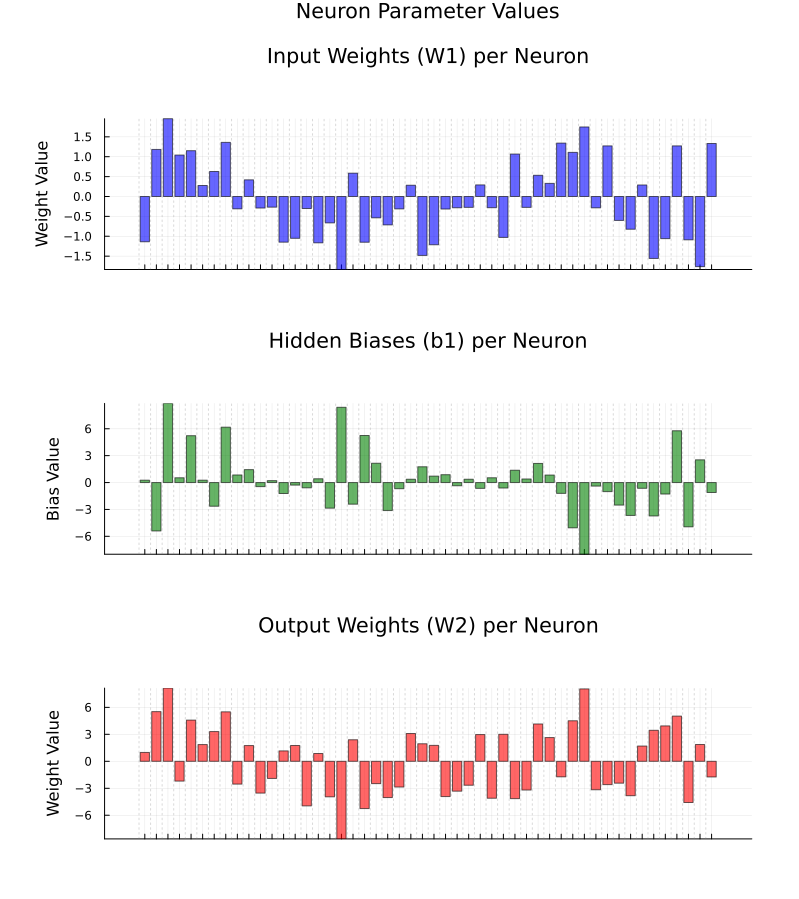

In [6]:
# Cell 6. Function to plot histograms

function plot_neuron_parameters(network::SimpleNN)
    n_neurons = length(network.hidden_biases)
    
    # Create plot with no x-axis numbers
    plt = plot(layout=(3,1), size=(800,900), legend=false,
               xticks=false)  # This removes all x-axis numbers
    
    # Plot 1: Input Weights - with invisible x-axis
    bar!(plt[1], 1:n_neurons, network.input_weights,
        title="Input Weights (W1) per Neuron",
        ylabel="Weight Value",
        color=:blue, alpha=0.6,
        xticks=(1:n_neurons, ["" for _ in 1:n_neurons]))  # Empty labels
    
    # Plot 2: Hidden Biases
    bar!(plt[2], 1:n_neurons, network.hidden_biases,
        title="Hidden Biases (b1) per Neuron", 
        ylabel="Bias Value",
        color=:green, alpha=0.6,
        xticks=(1:n_neurons, ["" for _ in 1:n_neurons]))
    
    # Plot 3: Output Weights 
    bar!(plt[3], 1:n_neurons, network.output_weights,
        title="Output Weights (W2) per Neuron",
        ylabel="Weight Value",
        color=:red, alpha=0.6,
        xticks=(1:n_neurons, ["" for _ in 1:n_neurons]))
    
    # Add subtle vertical lines to separate neurons
    for p in [plt[1], plt[2], plt[3]]
        for n in 1:n_neurons
            vline!(p, [n-0.5], linestyle=:dot, linecolor=:gray, linealpha=0.3)
        end
    end
    
    plot!(plt, margin=10Plots.mm, 
          plot_title="Neuron Parameter Values",
          plot_titlefontsize=14)
    
    return plt
end
# After training your network:
# nn = SimpleNN(5)  # Create/train network with 5 neurons
parameter_plot = plot_neuron_parameters(nn)
display(parameter_plot)

In [7]:
# Cell 6. Network training animation

function live_parameter_histograms(network::SimpleNN, x, y;
    epochs=1000, update_every=50, η=0.001)
    
    parameter_plot = plot_neuron_parameters(nn)
    # display(parameter_plot)

    # Training loop with animation
    anim = @animate for epoch in 1:epochs
        # Initialize gradients
        grad_in = zeros(length(network.input_weights))
        grad_hid = zeros(length(network.hidden_biases))
        grad_out = zeros(length(network.output_weights))
        grad_bias = 0.0
        total_error = 0.0

        # Batch training
        for i in 1:length(x)
            xi, yi = x[i], y[i]
            prediction, hidden_out, hidden_in = forward(network, xi)
            gi, gh, go, gb, err = backward(network, xi, yi, prediction, hidden_out, hidden_in)

            grad_in .+= gi / length(x)
            grad_hid .+= gh / length(x)
            grad_out .+= go / length(x)
            grad_bias += gb / length(x)
            total_error += err / length(x)
        end

        # Update weights
        update_weights!(network, grad_in, grad_hid, grad_out, grad_bias, η)

        # Update plots periodically
        if epoch % update_every == 0 || epoch == 1
            parameter_plot = plot_neuron_parameters(nn)
        end
    end every update_every

    # Save animation (optional)
    gif(anim, "parameter_evolution.gif", fps=10)

    # return parameter_plot
end

live_parameter_histograms (generic function with 1 method)

[ Info: Saved animation to /home/kvint/AIC/julia/parameter_evolution.gif


Plots.AnimatedGif("/home/kvint/AIC/julia/parameter_evolution.gif")
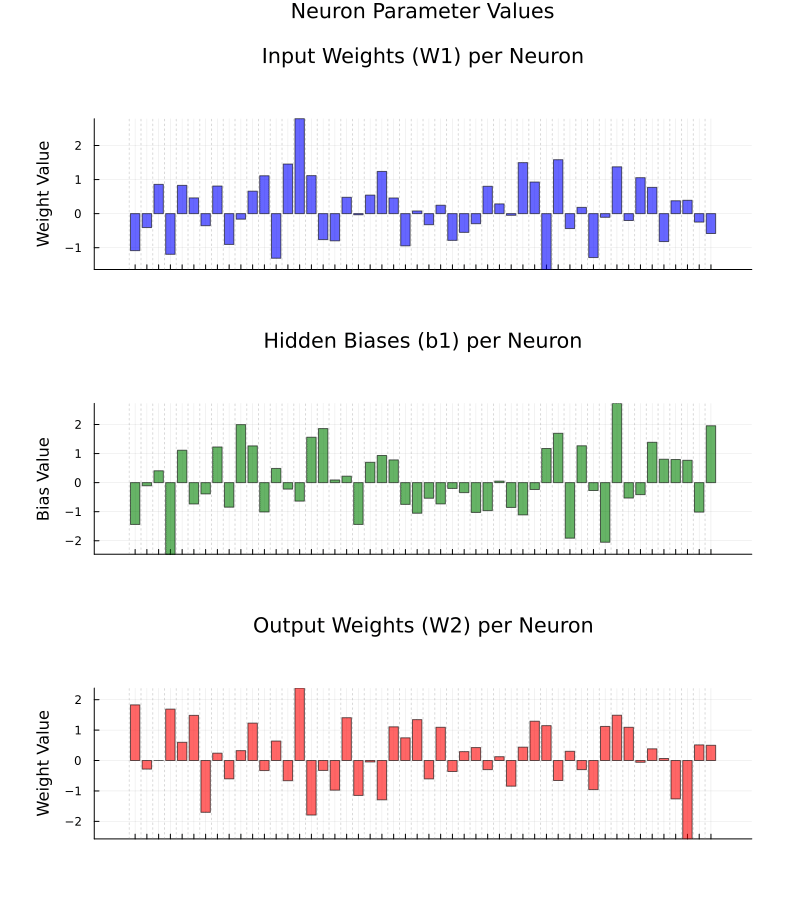

In [8]:
# Prepeare animation showing how the network parameters evolve
# Initialize network and data (using your exact code)
nn = SimpleNN(50)  # Using 50 neurons as in your example
x = collect(-5:0.1:5)
y = 0.3 .* x.^3 .- 2 .* x .+ randn(length(x))

# Run with live visualization (fewer epochs for demonstration)
live_parameter_histograms(nn, x, y, epochs=5000, update_every=100, η=0.001)

## Key Takeaways

1. **Neural Networks**: Stack of connected neurons that learn patterns
2. **Activation Functions**: Introduce non-linearity (e.g., sigmoid)
3. **Gradient Descent**: How networks improve their predictions
4. **Flexibility**: More neurons = more complex patterns learned

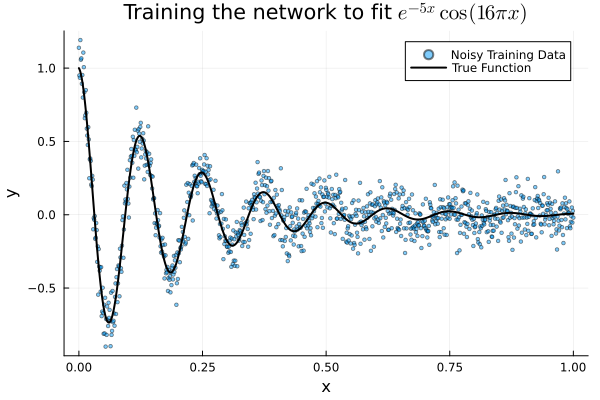

In [21]:
# Title and Data Generation for exp(-x)sin(x) Fitting
# --------------------------------------------------

# Set plot title (using LaTeX for mathematical notation)
title = "Training the network to fit \$e^{-5x}\\cos(16πx)\$"

# Generate training data
x_train_expsin = range(0, 1, length=1000)  # 1000 points from 0 to 1
x_train_expsin = reshape(collect(x_train_expsin), :, 1)  # Reshape to (1000, 1) matrix

# Generate target function: normalized exp(-5x)*cos(16πx) with noise
y_train_expsin = @. exp(-5 * x_train_expsin) * cos(16 * π * x_train_expsin)
y_train_expsin ./= maximum(y_train_expsin)  # Normalize to [-1, 1] range
y_train_expsin += 0.1 * randn(size(y_train_expsin))  # Add 1% Gaussian noise

# Visualization of the generated data
using Plots
scatter(x_train_expsin, y_train_expsin, 
        title=title,
        xlabel="x", ylabel="y",
        label="Noisy Training Data",
        markersize=2, alpha=0.5)
plot!(x_train_expsin, exp.(-5 .* x_train_expsin) .* cos.(16π .* x_train_expsin), label="True Function", linewidth=2, color=:black)

Training Round: 5000, Current Error: 0.05479137687696976
Training Round: 10000, Current Error: 0.05305089296475755
Training Round: 15000, Current Error: 0.052217509913469955
Training Round: 20000, Current Error: 0.05181286919687922
Training Round: 25000, Current Error: 0.051614430916665864
Training Round: 30000, Current Error: 0.05151616109471424
Training Round: 35000, Current Error: 0.05146684449514072
Training Round: 40000, Current Error: 0.0514415442165309
Training Round: 45000, Current Error: 0.0514280584722853
Training Round: 50000, Current Error: 0.05142039807840729


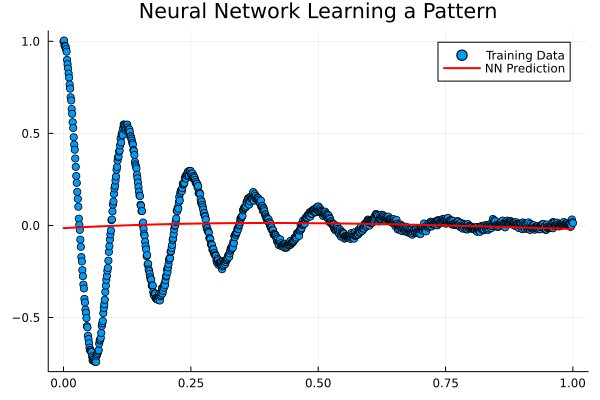

In [10]:
y_train = y_train_expsin
x_train = x_train_expsin

# TRAINING SETTINGS
learning_rate = 0.001  # How fast to learn (too big = unstable, too small = slow)
training_rounds = 50000  # How many times to see the data
num_neurons = 10  # Number of neurons in hidden layer

# CREATE OUR NETWORK
nn = SimpleNN(num_neurons)

# TRAINING LOOP - The actual learning process
for round in 1:training_rounds
    # Initialize all gradients to zero
    grad_in = zeros(num_neurons)
    grad_hid = zeros(num_neurons)
    grad_out = zeros(num_neurons)
    grad_bias = 0.0
    total_error = 0.0

    # Learn from each data point
    for i in 1:length(x_train)
        x, y = x_train[i], y_train[i]
        
        # 1. Make prediction
        prediction, hidden_out, hidden_in = forward(nn, x)
        
        # 2. Calculate what changes are needed
        gi, gh, go, gb, err = backward(nn, x, y, prediction, hidden_out, hidden_in)
        
        # 3. Accumulate changes (averaging across all data)
        grad_in .+= gi / length(x_train)
        grad_hid .+= gh / length(x_train)
        grad_out .+= go / length(x_train)
        grad_bias += gb / length(x_train)
        total_error += err / length(x_train)
    end

    # 4. Actually update the weights
    update_weights!(nn, grad_in, grad_hid, grad_out, grad_bias, learning_rate)

    # Print progress every 5000 rounds
    if round % 5000 == 0
        println("Training Round: ", round, ", Current Error: ", total_error)
    end
end

# VISUALIZE RESULTS
predictions = [forward(nn, x)[1] for x in x_train]  # Get predictions for all x values

# Create plot:
# - Points show original noisy data
# - Red line shows what the network learned
scatter(x_train, y_train, label="Training Data", 
       title="Neural Network Learning a Pattern")
plot!(x_train, predictions, label="NN Prediction", 
      linewidth=2, color=:red)

In [11]:
# Custom Activation Function: Sine + ReLU
# --------------------------------------
"""
    activation(x)

Combination of sine wave and ReLU activation for improved stability.
Returns sin(2πx) + max(0, x)
"""
function sine(x)
    return sin(2π * x) + max(0, x)
end

"""
    activation_derivative(x)

Derivative of the sine+ReLU activation function.
Returns 2π*cos(2πx) + (x > 0)
"""
function sine_derivative(x)
    return 2π * cos(2π * x) + (x > 0)
end

sine_derivative

Epoch 1000, Loss: 23.253791600505036
Epoch 2000, Loss: 8.668373808266374
Epoch 3000, Loss: 3.910293103410613
Epoch 4000, Loss: 2.254747088105687
Epoch 5000, Loss: 1.6490106564192897
Epoch 6000, Loss: 1.3946738987119096
Epoch 7000, Loss: 1.2728647669355528
Epoch 8000, Loss: 1.2073981100877418
Epoch 9000, Loss: 1.1686823382695521
Epoch 10000, Loss: 1.1439718117770152


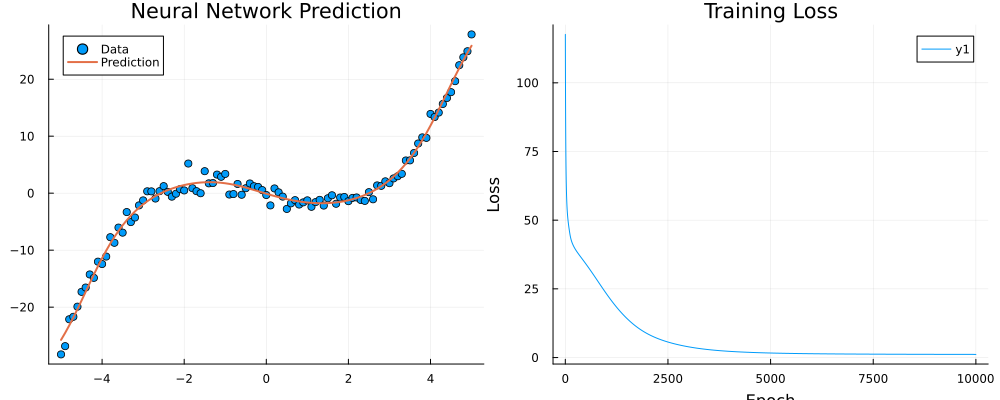

SimpleNN([1.0010184135900702, -0.2906784734616034, 0.256581623094885, -0.4944070809535235, 0.8953795033338688, 0.271144600504739, -1.6816732898334819, -1.4662600529976249, -1.6272908197312275, -0.25795904569506845, 1.7777944693843966, 1.2045991443862782, 1.2763829006476297, -1.7528579799557868, 0.7794487352554251, 2.177993748297889, 0.2575296326430947, -1.9193534841242188, 0.4428099348922026, 0.9194203469188824], [3.983643508046107, -0.3025270495275153, -0.3001962610515454, 2.114023667353954, -3.888407096593399, -0.8185105417294974, 7.359572899374092, -6.209285353279163, -0.6082708704069296, 0.49509587372833874, -7.804551834534351, -1.169016995274465, 5.293444627867282, -7.634430033211375, -3.379855725126688, 9.802241184284641, -0.48060067513440435, 8.475198974610672, -1.8808835330074898, -3.99331836445814], [3.365833058565743, -3.24143919687038, 3.0492815480153412, -4.231513790288828, 3.6356003630896496, 2.5781734797153097, -7.430088857705069, -7.629602363390319, 6.610205521113169, -3

In [12]:
using Plots, Random

# Define activation functions and derivatives
sigmoid(x) = 1 / (1 + exp(-x))
sigmoid_derivative(x) = sigmoid(x) * (1 - sigmoid(x))

relu(x) = max(0, x)
relu_derivative(x) = x > 0 ? 1.0 : 0.0

# Struct to hold neural network parameters
mutable struct SimpleNN
    input_weights::Vector{Float64}
    hidden_biases::Vector{Float64}
    output_weights::Vector{Float64}
    output_bias::Float64
end

# Constructor for SimpleNN
function SimpleNN(num_neurons::Int)
    SimpleNN(randn(num_neurons), randn(num_neurons), randn(num_neurons), randn())
end

# Forward pass function
function forward(network::SimpleNN, x, activation)
    hidden_input = network.input_weights .* x .+ network.hidden_biases
    hidden_output = activation.(hidden_input)
    prediction = sum(network.output_weights .* hidden_output) + network.output_bias
    (prediction, hidden_output, hidden_input)
end

# Backward pass function
function backward(network::SimpleNN, x, y, pred, hidden_out, hidden_in, activation_derivative)
    error = pred - y
    grad_output_weights = 2 .* error .* hidden_out
    grad_output_bias = 2 .* error

    hidden_error = 2 .* error .* network.output_weights .* activation_derivative.(hidden_in)
    grad_input_weights = hidden_error .* x
    grad_hidden_biases = hidden_error

    (grad_input_weights, grad_hidden_biases, grad_output_weights, grad_output_bias, error^2)
end

# Parameter update function
function update_weights!(network::SimpleNN, gi, gh, go, gb, lr)
    network.input_weights .-= lr .* gi
    network.hidden_biases .-= lr .* gh
    network.output_weights .-= lr .* go
    network.output_bias -= lr * gb
end

# Main training function
function train_network(x_values, y_values;
                        activation=sigmoid, activation_derivative=sigmoid_derivative,
                        num_neurons=10, learning_rate=0.001, epochs=10000, seed=42)

    Random.seed!(seed)

    # Initialize network
    nn = SimpleNN(num_neurons)

    # Track loss
    losses = Float64[]

    for epoch in 1:epochs
        grad_in = zeros(num_neurons)
        grad_hid = zeros(num_neurons)
        grad_out = zeros(num_neurons)
        grad_bias = 0.0
        total_error = 0.0

        for i in 1:length(x_values)
            x, y = x_values[i], y_values[i]
            pred, hidden_out, hidden_in = forward(nn, x, activation)
            gi, gh, go, gb, err = backward(nn, x, y, pred, hidden_out, hidden_in, activation_derivative)

            grad_in .+= gi / length(x_values)
            grad_hid .+= gh / length(x_values)
            grad_out .+= go / length(x_values)
            grad_bias += gb / length(x_values)
            total_error += err / length(x_values)
        end

        update_weights!(nn, grad_in, grad_hid, grad_out, grad_bias, learning_rate)
        push!(losses, total_error)

        # Optional: print progress
        if epoch % (epochs ÷ 10) == 0
            println("Epoch ", epoch, ", Loss: ", total_error)
        end
    end

    # Visualization
    predictions = [forward(nn, x, activation)[1] for x in x_values]

    # Create first plot: Data vs Prediction
    p1 = scatter(x_values, y_values, label="Data", title="Neural Network Prediction")
    plot!(p1, x_values, predictions, label="Prediction", lw=2)

    # Create second plot: Training Loss
    p2 = plot(1:epochs, losses, xlabel="Epoch", ylabel="Loss", title="Training Loss")

    # Display both plots
    # display(p1)
    # display(p2)
    plt = plot(p1, p2, layout=(1,2), size=(1000,400))
    display(plt)
    nn  # Return the trained network
end

# Example call to train network
x_data = collect(-5:0.1:5)
y_data = 0.3 .* x_data.^3 .- 2 .* x_data .+ randn(length(x_data))
nn = train_network(x_data, y_data, num_neurons=20, learning_rate=0.005, epochs=10000, activation=sigmoid,
                   activation_derivative=sigmoid_derivative)


Epoch 5000, Loss: 0.03962986352869086
Epoch 10000, Loss: 0.037041495937299454
Epoch 15000, Loss: 0.03501157160131509
Epoch 20000, Loss: 0.0340689200163646
Epoch 25000, Loss: 0.03445683118039405
Epoch 30000, Loss: 0.0329406065668358
Epoch 35000, Loss: 0.03206070817711445
Epoch 40000, Loss: 0.031229437004638306
Epoch 45000, Loss: 0.030313406602330464
Epoch 50000, Loss: 0.029302611819957497


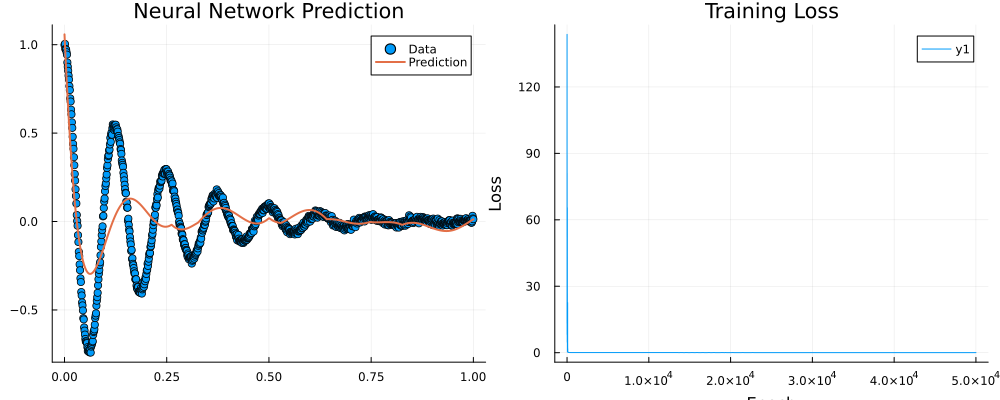

SimpleNN([-0.32427814264003657, 0.22674618033333754, -0.6223349135167894, -0.45510912816969257, 0.8242021327952825, 0.4591820091230578, -0.7645656957049577, -1.52007436089817, -1.7731736489246421, -0.014965553142988329  …  0.2178235451141093, 0.306636314913562, 0.08477100365057642, 0.515422437345867, 0.06266900754927338, 0.6581970290882099, -0.9975374486321544, -1.382278093411258, -0.8123185723414678, -0.2514105029231409], [0.7338021579658571, -0.9362092660058517, -1.1031372160213937, 1.1179530683600325, -0.09652840820632022, 0.45486931598566716, 0.95253918770543, -0.6155136515647102, -1.1793444665101087, 0.8396518825310272  …  -0.9607973026151021, -1.5198385115900652, -0.7398662557912772, 1.0110077340717831, 1.7113447232393229, 2.2356669691666613, 1.2489356626463273, -3.5026564956774995, -1.9832794765270951, 1.8226499261535496], [0.11820307705959691, -0.21442593936192447, 0.796402497937109, -0.060449669263477966, -0.11110135611744923, 0.13321346483699154, 0.22704824802213777, -1.27510

In [13]:
nn = train_network(x_train_expsin, y_train_expsin, num_neurons=50, learning_rate=0.005, epochs=50000, activation=sine,activation_derivative=sine_derivative)

Epoch 5000, Loss: 0.03864970547556499
Epoch 10000, Loss: 0.03548040828806188
Epoch 15000, Loss: 0.033402462236656986
Epoch 20000, Loss: 0.03161356340688543
Epoch 25000, Loss: 0.031940830229519664
Epoch 30000, Loss: 0.03269336798286321
Epoch 35000, Loss: 0.03129767242985101
Epoch 40000, Loss: 0.031000161194499325
Epoch 45000, Loss: 0.030760738233490827
Epoch 50000, Loss: 0.030379729538034892


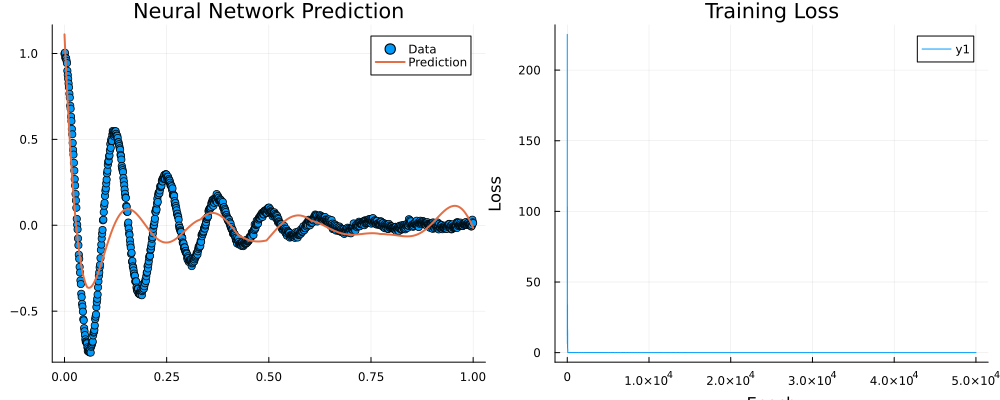

SimpleNN([-0.4524747899694299, 0.32514974296474564, -1.11686467421087, -0.45193483251670374, 0.8565427245636245, 0.48102188289579956, -0.8396493794254902, -0.02133050856783136, -1.4963201675793185, -0.04523531867690463  …  -0.7113016631545777, 0.23494363231206403, 1.9472676334364318, 0.5331583726915934, -0.5765721613671643, -2.840275656883973, -0.21782969414156966, -0.7203458815714665, -0.19634649768460039, -0.22629859329853536], [0.42882457583194106, -0.885856890834253, -1.9500567814515513, 0.9613485853170498, -0.047115828718794016, 0.46656427839371334, 1.0344756048406534, 1.7377539157864714, 0.9040977235023409, 0.7371962108271123  …  -2.218033002317419, -1.5102899607710232, -0.10761621115741125, -0.0030492704258714854, 0.6772413921373935, -3.1980801304636204, 1.7443551349357052, -0.3164250577963271, -0.7249727017909733, 1.8462021145558851], [0.15786244823796253, -0.019221029698395342, 0.8213968421432869, 0.05965050569103161, 0.121064074640028, 0.1042057772986952, 0.34352109255862917,

In [14]:
nn = train_network(x_train_expsin, y_train_expsin, num_neurons=50, learning_rate=0.01, epochs=50000, activation=sine,activation_derivative=sine_derivative)